In [1]:
import numpy as np

Generate Datasest

In [6]:
x = np.random.uniform(low=0.0, high =1.0, size = 100)

print(x.shape)
x[0:10]

(100,)


array([0.45972703, 0.43031907, 0.59503466, 0.37749302, 0.06246923,
       0.92383442, 0.72682777, 0.00230817, 0.89637728, 0.77741523])

In [9]:
y = 0.3*x

print(y.shape)
y[0:10]

(100,)


array([0.13791811, 0.12909572, 0.1785104 , 0.11324791, 0.01874077,
       0.27715033, 0.21804833, 0.00069245, 0.26891318, 0.23322457])

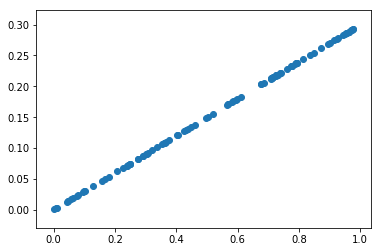

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)

##Case 1 - Random Search

In [19]:
num = 100
for a in range(num):
    a

In [40]:

best_error = 9999
best_w = None

for b in range(num):
    w= np.random.uniform(low=-1.0, high=1.0)
    y_pred = w*x
    error = y-y_pred
    k = np.abs(error).mean() #np.square().mean()
    if ( k < best_error):
        best_error = k
        best_w = w
        print("{0:3} w = {1:.5f}, error = {2:.5f}".format(b,best_w,best_error))

  0 w = 0.04329, error = 0.13429
  1 w = 0.38910, error = 0.04661
 28 w = 0.28800, error = 0.00628
 87 w = 0.30559, error = 0.00293


### Case 2 - H-step search

In [49]:
# w0, h0 설정
w = np.random.uniform(high=1.0,low=-1.0)
h= 0.1

for b in range(100):
    y_pred = w*x
    current_error = np.abs(y - y_pred).mean()
    
    y_pred = (w+h)*x
    new_error = np.abs(y-y_pred).mean()
    
    if(new_error < current_error):
        w = w+h
        print("{0:3} w = {1:.5f}, error = {2:.5f}".format(b,w,new_error))
        continue
    y_pred = (w-h)*x
    new_error = np.abs(y-y_pred).mean()
    
    if(new_error<current_error):
        w = w-h
        print("{0:3} w = {1:.5f}, error = {2:.5f}".format(b,w,new_error))
        continue
    break


  0 w = -0.09942, error = 0.20895
  1 w = 0.00058, error = 0.15663
  2 w = 0.10058, error = 0.10432
  3 w = 0.20058, error = 0.05201
  4 w = 0.30058, error = 0.00030


### Case3 - Gradient discent(not yet)

In [88]:
w = np.random.uniform(low=-1.0, high= 1.0)

for b in range(100):
        y_pred = w *x
        
        error = np.abs(y-y_pred).mean()
        print((y_pred-y).mean())
        print((y-y_pred).mean())
        w = w - (y_pred-y).mean()
        print("{} y_pred = {} w= {}, error = {}".format(b,y_pred[1],w,error))
        if (error < 0.001): break

-0.17781578280547528
0.17781578280547528
0 y_pred = -0.017174457670475537 w= 0.137904798787425, error = 0.17781578280547528
-0.08479598026492273
0.08479598026492273
1 y_pred = 0.059343065263911275 w= 0.22270077905234775, error = 0.08479598026492273
-0.04043712068548592
0.04043712068548592
2 y_pred = 0.09583239293941416 w= 0.2631378997378337, error = 0.04043712068548592
-0.01928346985581067
0.01928346985581067
3 y_pred = 0.11323325725322558 w= 0.2824213695936444, error = 0.01928346985581067
-0.009195813237351178
0.009195813237351178
4 y_pred = 0.12153130213803047 w= 0.2916171828309956, error = 0.009195813237351178
-0.004385257514780817
0.004385257514780817
5 y_pred = 0.12548843597164028 w= 0.2960024403457764, error = 0.004385257514780817
-0.0020912216216867167
0.0020912216216867167
6 y_pred = 0.12737549592304803 w= 0.2980936619674631, error = 0.0020912216216867167
-0.000997252238042982
0.000997252238042982
7 y_pred = 0.128275388474056 w= 0.2990909142055061, error = 0.000997252238042982


## @class2
## random_search

In [119]:
x1 = np.random.uniform(low=0.0, high =1.0, size = 100)
x2 = np.random.uniform(low=0.0, high =1.0, size = 100)
y1 = 0.3* x1+ 0.5*x2+0.1
y[0:10]

    
    
best_error = 9999
best_w1 = None
best_w2 = None
best_b = None
for b in range(100):
    w1 = np.random.uniform(low=-1.0,high=1.0)
    w2 =np.random.uniform(low=-1.0,high=1.0)
    k = np.random.uniform(low=-1.0,high=1.0)
    y_pred = w1*x1 + w2*x2 +k
    
    error = np.abs( y1-y_pred).mean() #np.square().mean()
    if ( error < best_error):
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_b  = k
        print("{0:3} w1 = {1:.5f},w2 = {2:.5f}, b= {3:.5f} error = {4:.5f}".format(b,best_w1,best_w2,best_b,best_error))

  0 w1 = -0.34603,w2 = 0.72377, b= -0.25545 error = 0.54473
  3 w1 = -0.87488,w2 = -0.17958, b= 0.91528 error = 0.34094
 13 w1 = 0.97196,w2 = 0.43382, b= -0.16786 error = 0.15303
 21 w1 = 0.54810,w2 = 0.80445, b= -0.15317 error = 0.10191
 26 w1 = 0.31295,w2 = 0.43120, b= 0.15209 error = 0.02603


In [128]:
learning_rate = 1
x1 = np.random.uniform(low=0.0, high =1.0, size = 100)
x2 = np.random.uniform(low=0.0, high =1.0, size = 100)
y1 = 0.3* x1+ 0.5* x2 +0.1
w1 = np.random.uniform(low=-1.0,high=1.0)
w2 = np.random.uniform(low=-1.0,high=1.0)
bi = np.random.uniform(low=-1.0,high=1.0)
for b in range(1000):
        
        y_pred = w1 *x1 + w2*x2 + bi
         
        error = np.abs(y1-y_pred).mean()
        if(b%10 ==0) :
            print("{0:3} w1 = {1:.5f},w2 = {2:.5f},b = {3:.5f} error = {4:.5f}".format(b,w1,w2,bi,error))
        if (error < 0.001): break
        w1 = w1 - learning_rate*((y_pred-y1)*x1).mean()
        w2 = w2 - learning_rate*((y_pred-y1)*x2).mean()
        bi = bi - learning_rate*(y_pred-y1).mean()
        

  0 w1 = -0.33395,w2 = -0.74835,b = 0.51857 error = 0.56109
 10 w1 = 0.02611,w2 = -0.05188,b = 0.52951 error = 0.15313
 20 w1 = 0.13548,w2 = 0.21101,b = 0.33651 error = 0.08242
 30 w1 = 0.20315,w2 = 0.34757,b = 0.23009 error = 0.04457
 40 w1 = 0.24385,w2 = 0.41911,b = 0.17156 error = 0.02419
 50 w1 = 0.26781,w2 = 0.45685,b = 0.13936 error = 0.01316
 60 w1 = 0.28170,w2 = 0.47687,b = 0.12165 error = 0.00718
 70 w1 = 0.28967,w2 = 0.48755,b = 0.11191 error = 0.00393
 80 w1 = 0.29420,w2 = 0.49328,b = 0.10655 error = 0.00216
 90 w1 = 0.29675,w2 = 0.49636,b = 0.10360 error = 0.00118
